<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del Subarreglo máximo

**Entrada:** Arreglo de n valores numéricos, positivos y negativos. $A=[a_1, a_2, ..., a_n]$

**Salida**: Subarreglo de A, tal que la sumatoria de sus elementos sea mayor o igual a la sumatoria de los otros subarreglos de A. 

Uno de los problemas de optimización es el problema del subarreglo máximo. Digamos que por ejemplo, tenemos un gráfico del futuro, detallando los valores de las acciones de alguna compañía en la bolsa. Nos entregan una cantidad de dinero, y tenemos que obtener la mayor cantidad de ganancia comprando y vendiendo una sola vez.


El gráfico puede reescribirse de modo que registre la diferencia en el valor de cada día. De este modo, lo que debemos hacer para saber cuando comprar y vender es **encontrar el arreglo donde la suma de valores sea máxima.**

Sin embargo, un arreglo de n elementos tiene aproximádamente $\Theta(n^2)$ subarreglos, y realizar una suma de subarreglos tiene tiempo de ejecución $O(n)$, por lo que una solución que compare subarreglos sería bastante costosa.

Para evitar estos costos, podemos en cambio usar un algoritmo recursivo. A continuación se presenta una implementación y explicación del algoritmo recursivo **MaxSubArray**.

#2. Función MaxMidArray

El algoritmo **MaxSubArray** depende en su funcionamiento de la función **MaxSubArrayMid**, la cual calcula el subarreglo máximo que contiene al elemento del medio.
##2.1 Descripción del Algoritmo
La función recibe como entrada al arreglo `array` y a tres índices, `start`, `mid` y `end`, que corresponden al inicio, mitad y fin del subarreglo que queremos analizar. Esta función retorna los índices del subarreglo máximo encontrado en este subarreglo, junto al valor de la sumatoria de sus elementos.
1. Primero, definimos a `max` y le asignamos el valor de `array[mid]`. Definimos también a `max_start` y `max_end`, asignándole el valor de `mid` a ambos. Estos serán los valores de retorno.
2. Definimos al iterador `i`, asignándole valor `mid - 1`. tambíen creamos a `sum`, que guardará el valor de la sumatoria y le asignamos el valor de `max`.
3. Recorremos el `array` desde `mid` hasta `start`, agregando el valor de `array[i]` a `sum`. Si este `sum` queda mayor a `max`, lo guardamos como nuevo `max`y guardamos el valor de `i` en `max_start`, definiendo el inicio del subarreglo máximo.
4. Una vez recorrida la primera mitad del arreglo, se hace lo mismo, recorriendo desde `mid` hasta `end`y definiendo al nuevo `max_end` si es necesario.
5. Ya recorridos ambos lados del arreglo, se retorna `max_start`, `max_end`y `max`.
##2.2 Código


In [ ]:
def MaxSubArrayMid(array,start,mid,end):
    max = array[mid]
    max_start = mid
    max_end = mid
    sum = max
    i=mid-1
    while(i>=start):
      sum += array[i]
      if (sum > max):
        max=sum
        max_start = i
      i-=1
    i = mid+1
    sum = max
    while (i<end):
      sum += array[i]
      if (sum > max) :  
        max = sum
        max_end = i
      i+=1
    return max_start, max_end, max


a=[-10, 2, 0, -1, 3, -1, 5, 4, -3, -7, 3]
print(a)
start,end,max = MaxSubArrayMid(a, 0, int(len(a)/2), len(a))
print('Subarreglo máximo en mid:', a[start:end+1], 'max:', max)

[-10, 2, 0, -1, 3, -1, 5, 4, -3, -7, 3]
Subarreglo máximo en mid: [2, 0, -1, 3, -1, 5, 4] max: 12


##2.3 Ejemplo

DIgamos que tenemos al arreglo $A=[-2, 3, -1, 2, -3]$. Llamamos a **MaxSubArrayMid** para encontrar al subarreglo máximo que contiene al elemento del medio.
El subarreglo máximo temporal lo vamos a guardar en un arreglo $B$ a modo de ilustración.

$A=[-2, 3, -1, 2, -3]$ , $B=[-1]$ , $max=-1$ , $sum = -1$

Desde el medio recorremos hacia la izquierda, y sumamos $3$ a $sum$. Como queda con valor $2$, este será el nuevo $max$, y agregaremos $3$ al inicio del arreglo $B$

$A=[-2, 3, -1, 2, -3]$ , $B=[3, -1]$ , $max=2$ , $sum = 2$

Seguimos recorriendo, sumándole ahora $-2$ a $sum$. Este va a quedar menor que $max$, por lo que éste y $B$ se mantienen iguales.

$A=[-2, 3, -1, 2, -3]$ , $B=[3, -1]$ , $max=2$ , $sum = 0$

Ya que llegamos al principio de $A$, retornamos al medio y empezamos a recorrer el arreglo hacia la derecha. A $sum$ le asignamos el valor de $max$ y le sumamos el elemento siguiente, el cual es $2$. Ya que $sum$ queda mayor, este será el nuevo $max$

$A=[-2, 3, -1, 2, -3]$ , $B=[3, -1, 2]$ , $max=4$ , $sum = 4$

Finalmente, llegamos al final de $A$, sumamos $-3$ a $sum$. Queda menor a $max$, por lo que no se hacen cambios.

$A=[-2, 3, -1, 2, -3]$ , $B=[3, -1, 2]$ , $max=4$ , $sum = 1$

Concluido el algoritmo, quedamos con el subarreglo máximo que contiene al elemento del medio.

$A=[-2, 3, -1, 2, -3]$ , $B=[3, -1, 2]$ , $max=4$ 

#3. Función MaxSubArray

##3.1 Descripción del algoritmo

El algoritmo recibe como entrada al arreglo `array` y a dos índices, `start` y `end`, los cuales representan el inicio y final del subarreglo que queremos analizar. Este retorna los índices del subarreglo máximo encontrado junto con el valor de su sumatoria para propósitos comparativos.

1. Primero, tenemos condición de termino. Si `start` es mayor o igual a `end`, esto significa que el subarreglo es de un elemento, por lo cual el subarreglo máximo es si mismo. Retorna al `start`y `end` que recibió, junto al valor de `array[start]`.
2. Luego, definimos a un índice `mid`, el cual se encuentra justo a la mitad entre `start` y `end`.
3. Llamamos recursivamente a **MaxSubArray**, esta vez con los índices `start` y `mid`. Esto calcula el subarreglo máximo que existe en el lado izquierdo, y los valores de retorno se guardan en `left_start`, `left_end` y `left_max`.
4. Para el lado derecho, hacemos lo mismo, pero con índices `mid +1`y `end`. Lo que retorna se guarda en `right_start`, `right_end` y `right_max`.
5. Se llama a la función **MaxSubArrayMid**, con entrada `array`, `start`, `mid` y `end`. Este retorna el subarreglo máximo que contiene al elemento en `mid`. Se guarda el retorno en `mid_start`, `mid_end` y `mid_max`.
6. Finalmente, se comparan los máximos obtenidos y se retorna el subarreglo máximo correspondiente.

##3.2 Código

In [ ]:
import random

def MaxSubArray(array, start,end,verbose=False):
    if start>end: return start,end, 0
    if start==end: 
      if end==len(array):return start-1, end, array[start-1]
      return start,end+1, array[start]
    if end == start + 1: return start, end, array[start]
    mid = start +int((end-start)/2)
    if verbose: print("llamando a MaxSubArray para la mitad izquierda de", array[start:end])
    left_start, left_end, left_max = MaxSubArray(array,start,mid, verbose)
    if verbose: print('Subarreglo máximo izquierdo:',array[left_start:left_end],' Máximo izquierdo:', left_max)
    if verbose: print("llamando a MaxSubArray para la mitad derecha de", array[start:end])
    right_start, right_end, right_max = MaxSubArray(array, mid, end, verbose)
    if verbose: print('Subarreglo máximo derecho:',array[right_start:right_end],' Máximo derecho:', right_max)
    if verbose: print("llamando a MaxSubArrayMid para", array[start:end])
    mid_start, mid_end, mid_max = MaxSubArrayMid(array,start,mid,end)
    if (right_max > mid_max and right_max > left_max):
      return right_start, right_end, right_max
    elif (left_max > mid_max and left_max > right_max):
      return left_start, left_end, left_max
    else:
      return mid_start, mid_end, mid_max


a = random.sample(range(-15, 20), 8)
print(a)
start,end,max = MaxSubArray(a, 0, len(a))
print('Subarreglo máximo de a:', a[start:end+1], 'max:', max)

[-4, 13, 6, 4, -10, -5, 15, 1]
Subarreglo máximo de a: [13, 6, 4, -10, -5, 15, 1] max: 24


##3.3 Ejemplo

Digamos que tenemos a un arreglo $A=[4,-5,-1,6,2]$ y llamamos a **MaxSubArray** para encontrar al subarreglo máximo.
Entrando al algoritmo, llamamos recursivamente a MaxSubArray para las mitades de la izquierda y de la derecha.

$B_1 =[4,-5]$ , $B_2=[6,2]$

Nuevamente, llamamos recursivamente a MaxSubArray a las mitades de los subarreglos.

$C_1 =[4]$ , $C_2=[-5]$ , $C_3 =[6]$ , $C_4=[2]$

Naturalmente, como estos subarreglos solo tienen un elemento, cada uno es su subarreglo máximo.

$MaxSubArray(C_1)= [4]$,$MaxSubArray(C_2)= [-5]$,$MaxSubArray(C_3)= [6]$,$MaxSubArray(C_4)= [2]$,

Retornando al nivel superior, llamamos a **MaxSubArrayMid** para $B_1$ y $B_2$. 

$MaxSubArrayMid(B_1) = [4,-5]$ , $MaxSubArrayMid(B_2) = [6,2]$

Ya que el máximo de $C_1$ es mayor que el máximo medio de de B1 obtenido en el paso anterior, es este el que se retorna como máximo subarreglo de $B_1$.

$MaxSubArray(B_1)= [4] = B^´_1$,

Para $B_2$, retornamos su máximo subarreglo, que en este caso es obtenido con MaxSubArrayMid, ya que la suma es superior.

$MaxSubArray(B_2)= [6,2] = B^´_2$,

Volviendo al primer nivel, llamamos a **MaxSubArrayMid** con el arreglo original $A$.

$MaxSubArrayMid(A)= [-1,6,2] = A^´$

Finalmente, vemos cual de estos subarreglos es el mayor.

$Sum(B^´_1) = 4$

$Sum(B^´_2) = 8$

$Sum(A^´) = 7$

$B^´_2$ tiene la mayor suma, por lo tanto se retorna como mácimo subarreglo. En fin:

$MaxSubArray(A) = [6,2]$



##3.4 Ejecución paso a paso (`verbose = True`)

In [ ]:
a = [16,4,-8,-2]
print(a)
start,end,max = MaxSubArray(a, 0, len(a), True)
print('Subarreglo máximo de a:', a[start:end+1], 'max:', max)

[16, 4, -8, -2]
llamando a MaxSubArray para la mitad izquierda de [16, 4, -8, -2]
llamando a MaxSubArray para la mitad izquierda de [16, 4]
Subarreglo máximo izquierdo: [16]  Máximo izquierdo: 16
llamando a MaxSubArray para la mitad derecha de [16, 4]
Subarreglo máximo derecho: [4]  Máximo derecho: 4
llamando a MaxSubArrayMid para [16, 4]
Subarreglo máximo izquierdo: [16]  Máximo izquierdo: 20
llamando a MaxSubArray para la mitad derecha de [16, 4, -8, -2]
llamando a MaxSubArray para la mitad izquierda de [-8, -2]
Subarreglo máximo izquierdo: [-8]  Máximo izquierdo: -8
llamando a MaxSubArray para la mitad derecha de [-8, -2]
Subarreglo máximo derecho: [-2]  Máximo derecho: -2
llamando a MaxSubArrayMid para [-8, -2]
Subarreglo máximo derecho: []  Máximo derecho: -2
llamando a MaxSubArrayMid para [16, 4, -8, -2]
Subarreglo máximo de a: [16, 4] max: 20


#4. Correctitud
##4.1 Correctitud de MaxSubArrayMid

### **Teorema (Correctitud)**

*El algoritmo **MaxSubArrayMid** recibe un arreglo  `A` con índices `start`, `mid` y `end`, determinando el inicio, mitad y final de un subarreglo de A, y retorna indices al subarreglo máximo que contiene al elemento del medio.*

## Prueba del Teorema

Probaremos pues la siguientes **propiedad invariante del bucle** con `MaxSubArrayMid`:

>Para el lado izquierdo, al comienzo de cada iteración `i`, la suma del subarreglo definido por `A[max_start:max_end]` es mayor que cualquier otra suma de subarreglos , para todos los subarreglos posibles en `A[j:max_end]` que contengan al elemento `A[mid]`, donde `j = mid-i < mid`.

>Para el lado derecho, al comienzo de cada iteración `i`, la suma del subarreglo definido por `A[max_start:max_end]` es mayor que cualquier otra suma de subarreglos , para todos los subarreglos posibles en `A[max_start:i]` que contengan al elemento `A[mid]`, donde `i > mid`.

**Inicialización: Lado Izquierdo**

Antes de empezar a iterar al lado izquierdo, `max_start`y `max_end` son iguales a `mid`, y `i = 0`, por lo que `j= mid`. El unico subarreglo posible es el que sólo contiene a `A[mid]`, por lo que, trivialmente, el subarreglo es máximo.

**Mantención: Lado Izquierdo**

Usaremos inducción para probar que se la propiedad cumple en una iteración `n`, donde `0 < n < mid`. Asumiremos que se cumple para `m = n-1`, por lo tanto, el arreglo `A[max_start:max_end]` es subarreglo máximo de todos los arreglos posibles en `A[mid-m:mid]` que tengan al elemento del medio. 

Tenemos al valor `sum`, que por ahora contiene la sumatoria de `A[mid-m:mid]`. A este `sum` le sumaremos el valor de `A[mid-n]`, obteniendo pues la sumatoria de `A[mid-n:mid]`. Comparamos a este `sum` con `max`, que es la sumatoria de `A[max_start:max_end]`.

A continuación se presentan dos casos:
1. Si `sum > max`, entonces asignamos a `max_start` el valor de `mid-n`, definiendo pues al nuevo subarreglo máximo.
2. Si `sum =< max` este no puede ser el subarreglo máximo, por lo tanto `max_start` sigue igual y se sigue avanzando.

Por lo tanto, el subarreglo `A[max_start:max_end]` sigue siendo el subarreglo máximo que contiene al elemento del medio, desde `mid-n` hasta `mid`. 

**Inicialización: Lado derecho**

Asumiendo que la iteración en el lado izquierdo fue correcta, el subarreglo `A[max_start:max_end]` es efectivamente el subarreglo máximo que contiene a `A[mid]`, de todos los casos posibles en `A[start:mid]`. Antes de iterar, sabemos que `max_end` siguie siendo `mid`, y al iterar, vamos a empezar desde i = mid + 1. Por lo tanto, antes de iterar, deberiamos considerar un i = mid. 
Por tanto, considerando la primera aseveración, se cumple que `A[max_start:max_end]` es el máximo subarreglo posible adentro de`A[max_start:i]`.

**Mantención: Lado Derecho**

Usaremos inducción para probar que se la propiedad cumple en una iteración `n`, donde `mid < n < end`. Asumiremos que se cumple para `m = n-1`, por lo tanto, el arreglo `A[max_start:max_end]` es subarreglo máximo de todos los arreglos posibles en `A[max_start:m]` que tengan al elemento del medio. 

Tenemos al valor `sum`, que por ahora contiene la sumatoria de `A[max_start:m]`. A este `sum` le sumaremos el valor de `A[n]`, obteniendo pues la sumatoria de `A[max_start:n]`. Comparamos a este `sum` con `max`, que es la sumatoria de `A[max_start:max_end]`.

A continuación se presentan dos casos:
1. Si `sum > max`, entonces asignamos a `max_end` el valor de `n`, definiendo pues al nuevo subarreglo máximo.
2. Si `sum =< max` este no puede ser el subarreglo máximo, por lo tanto `max_end` sigue igual y se sigue avanzando.

Por lo tanto, el subarreglo `A[max_start:max_end]` sigue siendo el subarreglo máximo que contiene al elemento del medio, desde `mid-n` hasta `mid`. 

**Correctitud:**

Ya que las propiedades invariante del bucle propuestas se mantienen verdadera para iteración lateral, el algoritmo **MaxSubArrayMid** es correcto.

##4.2 Correctitud de MaxSubArray

### **Teorema (Correctitud)**

*El algoritmo **MaxSubArray** recibe un arreglo  `A` de $n$ elementos, con índices `start` y `end`, determinando el inicio y final de un subarreglo de A, y retorna indices al subarreglo máximo posible dentro de este subarreglo.*

## Prueba del Teorema

Usaremos inducción matemática para probar este teorema. Si esta declaración la denominamos P(n) para un arreglo de n elementos, entonces debemos probar que se cumple para los siguientes casos:

1. $P(1)$. El caso base, cuando lo que recibe es un arreglo con un solo elemento. Como sabemos segun el código, cuando el subarreglo solo tiene un elemento, se retorna así nomas. Y trivialmente, sabemos que el subarreglo máximo de un arreglo de 1 elemento es el mismo elemento.

2. Si $m< n$ y $P(m)$ es verdadero, entonces $P(n)$ es verdadero. Como sabemos, la función se llama a si mísma dos veces, con arreglos de tamaño $m=n/2.$ Si $P(m)$ es verdadero, entonces efectivamente tendremos los subarreglos máximos de cada lado. Luego llamamos a MaxSubArrayMid, el cual es correcto y retorna el subarreglo máximo que contiene al elemento del medio. Finalmente, se decide cual de estos tres subarreglos tiene máximo mayor; este es el que se retorna. Ya que todos los subarreglos máximos son correctos, este retorno es correcto tambien.

Ya que ambos casos son correctos, el algoritmo es correcto.

#5. Tiempo de Ejecución

###**Teorema(Tiempo de ejecución)** 

*El algoritmo **MaxSubArrayMid** tiene un tiempo de ejecución de $O(nlog_2n)$.*

##Prueba del Teorema

Digamos que $T(n)$ es el tiempo de ejecución de **MaxSubArray** para un arreglo de $n$ elementos. Sabemos que en casos generales, **MaxSubArray** se llama recursivamente dos veces con arreglos de $n/2$ elementos, y además que llama a la función **MaxSubArrayMid**. Ésta recorre al arreglo desde el medio hasta el principio y desde el medio hasta el final, iteración lineal que resulta en un tiempo de ejecución $O(n)$.
Por lo tanto, podemos decir que:

$T(n) = 2T(n/2) + O(n)$

Para resolver esta recurrencia, usaremos el método maestro. Para esto, debemos reescribir la función de la siguiente manera e identificar los valores $a$, $b$ y $d$:

$T(n) \leq aT(n/b)+O(n^d)$

$a = 2, b=2, d =1$

El Teorema Maestro es el siguiente:

![image](https://i.imgur.com/Fbati5a.png)

Ya que $2 = 2^1$ es el caso uno, podemos asegurar que el tiempo de ejecución de **MaxSubArray** es $O(n^1logn)$



#6. Experimentos

##6.1 Mejor y Peor Caso.

Analizando el código, cuesta definir un mejor y peor caso. A modo de experimentación, analizaré que es lo que sucede cuando el arreglo de entrada está compuesto por puros unos (cuyo subarreglo máximo sería el arreglo entero) y cuando está compuesto por unos negativos (cualquier subarreglo de tamaño 1 sería un máximo.

También experimentaré con un arreglo que alterne entre unos negativos y positivos.


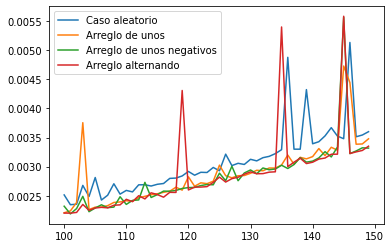

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y=[];
y2=[]
y3=[]
y4=[]

for n in range(100,150):

  a = random.sample(range(-100, 100), n) 
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  b = [1 for x in range(n)]
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({b},{0},{len(b)})", repeat=1, number=10)
  y2.append(t)
  c= [-1 for x in range(n)]
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({c},{0},{len(c)})", repeat=1, number=10)
  y3.append(t)
  d= [(-1)**x for x in range(n)]
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({d},{0},{len(d)})", repeat=1, number=10)
  y4.append(t)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(["Caso aleatorio", "Arreglo de unos", "Arreglo de unos negativos","Arreglo alternando"])

Analizando el gráfico, podemos apreciar de que si bien todas las curvas son relativamente similares, el caso aleatorio se demora más que los otros casos. Por lo tanto, podemos sugerir que el mejor caso se encuentra en uno de los arreglos experimentales propuestos.

Las mejoras de tiempo son bastantes pequeñas, eso si. Probablemente se deba a ahorros a la hora de sumar y comparar valores simples.

##6.2 Kadane vs Recursión

Definamos al algoritmo de Kadane como tal:

In [ ]:

from sys import maxsize
  

def Kadane(a):
    max = -maxsize - 1
    temp_max = 0
    start = 0
    end = 0
    s = 0
    for i in range(0,len(a)):
        temp_max += a[i]
        if max < temp_max:
            max = temp_max
            start = s
            end = i
        if temp_max < 0:
            temp_max = 0
            s = i+1
    return start, end, max
  

a = random.sample(range(-15, 20), 8)
print(a)
start, end, max = Kadane(a)
print(a[start:end+1], max)

[2, -13, -7, 1, 16, 3, 8, 12]
[1, 16, 3, 8, 12] 40


Ya que este algoritmo recorre el arreglo una sola vez, podemos asegurar con confianza que su tiempo de ejecución será de $O(n)$. A continuación mostraremos gráficamente la diferencia de tiempos de ejecución con la implementación recursiva.

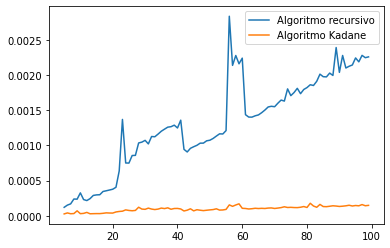

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y1=[]
y2=[]


for n in range(5,100):

  a = random.sample(range(-100, 100), n) 
  b = a.copy()
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)})", repeat=1, number=10)
  x.append(n)
  y1.append(t)
  t = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({b})", repeat=1, number=10)
  y2.append(t)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Algoritmo recursivo", "Algoritmo Kadane"])

Como se puede ver, Kadane tiene un tiempo minúsculo de ejecución comparado con el algoritmo recursivo. Si bien algoritmos con paradigma divide y vencerás pueden ser mucho más rapidos comparados con algoritmos lineales para problemas de ordenamiento, este no siempre es el caso cuando el problema es de optimización.